<img src="https://imgs.search.brave.com/nAN7oz_7Lp8wj8rE-mskHnfOvhevF5v56ZXkqOwjbKc/rs:fit:500:0:0:0/g:ce/aHR0cHM6Ly9zMy5l/dS13ZXN0LTMuYW1h/em9uYXdzLmNvbS9t/b292aWpvYi5wcm9k/LzI0NjUyOTAvbGdf/Y2VzaS1qYXVuZS5w/bmc" style="height:100px;">


# <center> <strong> Project Smart Mobility and Route Optimization </center>

# <center> Implementation and operation

**Group 2** :
- Jeremy LE FOULON
- Andrew KINUTHIA
- Adnan CYUSA


 Date : 11/11/24

#I.  Introduction
## Context

ADEME, the french environment and energy managment agency, launched a call to test mobility solutions for people and goods in different areas, and our CesiCDP structure is well established in the field.

Being part of the team in charge of answering ADEME's call, we focus on the managment of delivery routes, as decided by CesiCDP.

Our primary goal is to be able to calculate, on a road network, a set of routes that connect a subset of cities between each other before returning to the starting point, all while minimizing the total duration of the route. A given city must be traversed by exactly one route of that set of routes.

However, in order to make our problem more realistic and get ADEME's full attention, we decided to add additional constraints.


## Issue

How to determine a set of routes, where all cities are visited exactly once such that each route goes back to the starting point (origin) and the time after which the last truck returns to the origin is mininmized?

## Constraints

- A truck should have a sufficient capacity to deliver all the goods to each of the delivery points it has to go to
- Each truck can only go through a single delivery path
- The solution should be as accurate as possible in a reasonable amount of time
- The resulting code should provide a good enough solution even for large instances

## Assumptions

- $k$ trucks are simultaneously available
- All the trucks that are allocated to solve this issue must be used.



# II. Modelling

## Vehicle Routing Problem

**What is VRP?**

The Vehicle Routing Problem (VRP) is a classical combinational optimization problem that involves determining the most optimal/ minimum-cost set of routes for a fleet of vehicles with known vehicle capacities from a central depot to serve a given set of geographically dispersed customers who are served once, with the objective of minimizing total cost/ distance/ distribution cost travelled with satisfying some constraints (Azzahra Zayyan Firdaus ,2023).

VRP is a *NP-HARD* problem (Said Elatar et al., 2023) and has many variants corresponding to different real-world problems.

We believe our problem has its roots in Travelling Salesman problem (TSP) because VRP is an extension of TSP. This is why we believe so:


1.   **Multiple Vehicles:** TSP is typically about finding the shortest route for a single "salesman" to visit a series of locations and return to the starting point. VRP extends this by incorporating multiple vehicles that need to cover different parts of a network, each starting and ending at a central depot.
2.   **Capacity Constraints:** In TSP, there’s no limit on the amount of goods the salesman can carry. VRP, on the other hand, often includes capacity constraints on the vehicles. Each vehicle can carry only a certain amount of goods, and this limit impacts route planning, as the solution must balance the load across the fleet.
3. **Minimizing Total Cost:** While TSP generally focuses on minimizing travel distance or time for a single route, VRP optimizes the combined cost across multiple vehicles. Costs can include distance, fuel consumption, labor, and other factors associated with a fleet rather than a single route.
4. **Route Balancing:** VRP often considers balancing workloads among the vehicles, unlike TSP, where only a single route is optimized. This requirement ensures that no single vehicle is overburdened or underutilized.

Thus, with our case being a more real-life problem, VRP is more applicable to logistics, distribution, and supply chain scenarios, where real-world constraints make the simpler TSP model insufficient.

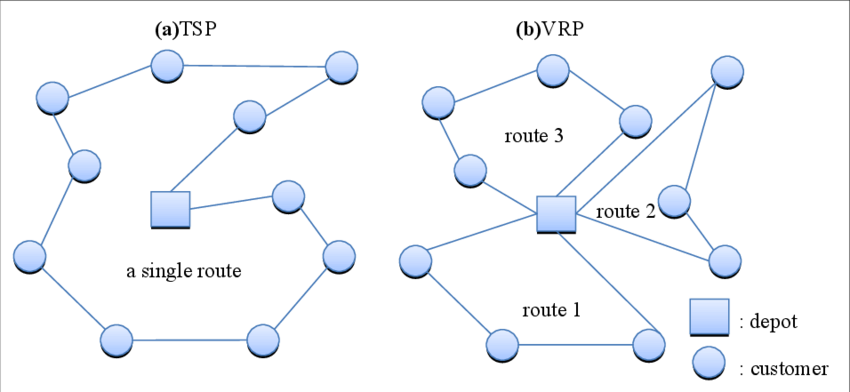

## Formal representation

### Decision Problem
**Data**:
- Complete, weighted and undirected graph $G(V,E)$ with $V$ being the vertices, $E$ being the edges
- The starting point $u \in V$
- N° of trucks $k \in \mathbb {N}$
- Demand $d_{\scriptscriptstyle i}$ for each vertex $v_{\scriptscriptstyle i}$
- Threshold $q \in \mathbb {R} $
  
**Problem** : $(P1)$ Is there  a set of cycles $S$ in $G$, one for each of the $k$ trucks, all starting from $u$, where each vertex in V is traversed by exactly one cycle in $S$, with $l$ being the total length of the longest path in $S$, and the sum of the demands of vertices traversed by any given cycle in $S$ doesn't exceed a trucks capacity, such that $l \leq q$ ?

<br>

### Optimisation problem

**Data**:
- Complete, weighted and undirected graph $G(V,E)$ with $V$ being the vertices, $E$ being the edges
- The starting point $u \in V$
- N° of trucks $k \in \mathbb{N} $
- Demand $d_{\scriptscriptstyle i}$ for each vertex $v_{\scriptscriptstyle i}$

**Problem** : What is the smallest $q$ where $(P1)$ is true?

While our objective is to minimise the total cost of the most costly path in $S$, minimising the sum of the total costs of the different paths in $S$ is equivalent and easier to deal with mathematically. This is why we will focus mostly on the latter in the code and the mathematical models.

<br>

### Identification of variables

<!--### Fixed variables

- Time slot ($t$)
Time slots are not included in our mathematical model

### Unfixed variables
-->

- Cost of edge between $v{\scriptscriptstyle i}$ and $v{\scriptscriptstyle j}$: ($c{\scriptscriptstyle ij}$)
- Truck capacity ($R$)
- Starting point $v{\scriptscriptstyle s}$
- Demand $d{\scriptscriptstyle i}$ for vertex $v{\scriptscriptstyle i}$
- Number of available trucks $K$

<br>

## Data Structures

### Instances of the problem


To represent instances of our particular problem, we can already define:
- The starting point $v_{\scriptscriptstyle s}$ can be represented as the bare integer $s$.
- The number of trucks is just an integer
<br>

As seen before, our problem involves a complete graph. Adjacency lists are more optimised in terms of memory for sparse graphs, while adjacency matrices are best for denser graphs. This means that the most optimal of these two for representing our vertices and edges is an adjacency matrix.
<br>

One important data value still needs a data structure. This is the demands of the different vertices. It can simply be represented as an array of integers (a tuple of integers in python), where the integer at index $i$ represents the demand of vertex $v_{\scriptscriptstyle i}$.

Below is an example of how this could be implemented in Python:

In [ ]:
import random as _random
from collections.abc import Iterable, Callable, Generator



def create_adjacency_matrix(size: int, cb: Callable[[int, int, object], int]) -> Iterable[Iterable[int]]:
    """
    Function that creates an adjacency matrix for a graph with 'size' vertices.
    Each cell at [i, j] in the matrix has its value set iteratively to the result of calling 'cb(i, j, adj)'.
    """
    adjacency = []

    for i in range(size):
        adjacency.append([])
        for j in range(size):
            value = cb(i, j, adjacency)
            adjacency[-1].append(value)

    return adjacency


def random_adjacency_matrix(size: int, max_cost: int, directed: bool = False) -> Iterable[Iterable[int]]:
    """
    Randomly generate an adjacency matrix for a complete graph of 'size' vertices,
    limiting the cost of edges to 'max_cost'.
    """
    def _callback(i, j, adj):
        """
        Called by 'create_adjacency_matrix' for each cell in the matrix.
        """
        # diagonal should be zeroes
        if j == i:
            return 0
        # matrix should be symmetrical if graph is undirected
        if (j < i) and (not directed):
            return adj[j][i]
        return _random.randint(1, max_cost)

    return create_adjacency_matrix(size, _callback)


def str_adjacency_matrix(matrix: Iterable[Iterable[int]]) -> str:
    max_lengths = [0 for _ in range(len(matrix[0]))]
    for j in range(len(matrix)):
        row = matrix[j]
        for i in range(len(row)):
            length = len(str(row[i]))
            if length > max_lengths[i]:
                max_lengths[i] = length

    return '\n'.join(('  '.join(str(row[i]).rjust(max_lengths[i]) for i in range(len(row)))) for row in matrix)


class Problem:
    def __init__(self, adjacency: Iterable[Iterable[int]], start: int, truck_count: int, truck_capacity: int, demands: Iterable[int]):
        """
        Constructor.
        Our problem is represented as follows:
        - 'adjacency' is the adjacency matrix for our graph as a mutable list of lists. It contains the weights of the different edges
        - 'start' is the index of the starting point
        - 'truck_count' is the number of trucks available
        - 'truck_capacity' is the capacity of a truck
        - 'demands' stores the weight of each vertex in the graph in the form of an immutable list
        """
        self.adjacency = adjacency
        self.start = start
        self.truck_count = truck_count
        self.truck_capacity = truck_capacity
        self.demands = demands


    @classmethod
    def random(cls, vertex_count: int, max_cost: int, max_demand: int, max_truck_count: int, max_truck_capacity: int) -> 'Problem':
        """
        Randomly generates an instance of the problem, given a maximum for the relevant properties.
        weights, demands and number of trucks have a minimum of 1,
        start has a minimum of 0
        """
        # if the number of trucks exceeds the number of vertices, the problem becomes unsolvable because all trucks must be used
        if max_truck_count > vertex_count:
            max_truck_count = vertex_count

        # generate the adjacency list
        adjacency = random_adjacency_matrix(vertex_count, max_cost)

        # starting point
        start = _random.randint(0, vertex_count - 1)

        # number of trucks, 0 trucks doesn't make sense
        truck_count = _random.randint(1, max_truck_count)

        # demands for each vertex, a demand of 0 would be the same as the vertex not being in the graph
        # the starting point must have a demand of 0
        demands = tuple((_random.randint(1, max_demand) if i != start else 0) for i in range(vertex_count))

        # if the truck capacity is smaller than the most demanding vertex, the
        # problem is never solvable so we exclude this case
        min_truck_capacity = max(demands)
        truck_capacity = _random.randint(min_truck_capacity, max_truck_capacity)

        # returning the actual instance of our problem
        return cls(adjacency, start, truck_count, truck_capacity, demands)


    def __str__(self):
        """
        Defines how an instance of the problem should be represented as a string.
        """
        str_adj = str_adjacency_matrix(self.adjacency)
        return (f"Instance of our problem: \nstart={self.start}, truck_count={self.truck_count}, truck_capacity={self.truck_capacity}\n"
                + f"demands: \n{', '.join(str(i) for i in self.demands)}\nadjacency: \n{str_adj}"
                )


### Solution space of the problem

In this section, we define the *Solution space* of a problem as the domain composed of all potential solutions to that problem.
<br>
We also define the *Feasible solution space* of a problem as the domain composed of all solutions that are part of the Solution space and meet the constraints of that problem.

**1) Solutions**
<br>

A solution to our problem is a set of cycles $S$, exactly one for each truck. Any two of these cycles must have no vertices in common except for the starting point. All cycles must start and end at the same vertex.
<br>

It is important to note that we will need to represent such solutions with an integer linear programming model. It is also important to note that we will need to navigate quickly from one solution to its neighbours.
This is why we chose to represent our solutions in two different forms.
<br>

One of them is a 3-dimensional matrix of boolean values where $x_{\scriptscriptstyle ijk}$ is $1$ if truck $k$ goes from vertex $v_{\scriptscriptstyle i}$ to vertex $v_{\scriptscriptstyle j}$ and $0$ otherwise; and is used for integer linear programming.
<br>

The other one is a list of paths, one for each truck. Each path is represented by a list of integers designating the list of indices, in order, visited by a given truck. This form is used for metaheuristics.

**2) Neighourhood**

We defined two solutions as being neighbours if one can be obtained by swapping two nodes of the other. If a solution's neighbour doesn't match the constraints of the problem, then it itself isn't considered a solution of the feasible solution space, and is therefore not searched through.

A solution's neighbours can be easily found in the case of metaheuristics explained above by simply moving one value within the lists of the different trucks' paths.

Below is an example of how this could be implemented in Python:


In [ ]:


class Solution:
    def __init__(self, problem: Problem, paths: Iterable[Iterable[int]]):
        self.problem = problem  # the instance of the problem of which the current object is a solution
        # make sure our paths are tuples so they are hashable. This is required for caching later on.
        self.paths = tuple(tuple(p) for p in paths)

    def __str__(self):
        """
        Defines how a solution to the problem should be represented as a string.
        """
        nl = '\n'
        str_paths = []
        for i in range(len(self.paths)):
            path = self.paths[i]
            str_paths.append(f"Truck {i}: " + '=>'.join(str(node) for node in path))
        return f"Solution of a routing problem:\n {nl.join(str_paths)}"



Let's create an example instance of our problem and display its graphical representation.

Instance of our problem: 
start=0, truck_count=4, truck_capacity=10
demands: 
0, 3, 5, 2, 2
adjacency: 
 0   4  10   9   3
 4   0   6  10   8
10   6   0  10   2
 9  10  10   0  10
 3   8   2  10   0


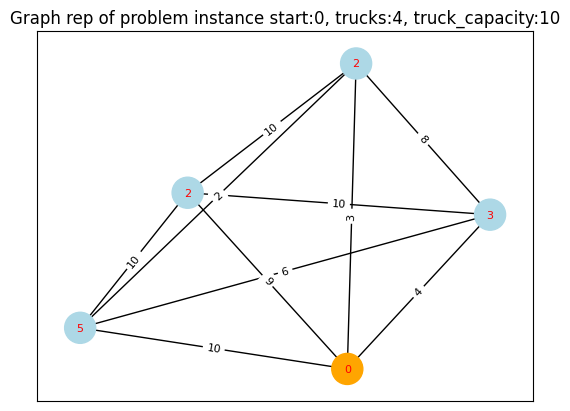

In [ ]:
#representation of instance as graph
#it should take the adjacency matrix and the demands to plot the vertices with their weights
#and the edges with each weight

import networkx as nx
import matplotlib.pyplot as plt

def plot_problem(adjacency, start, truck_count, truck_capacity, demands, vertex_count):
  #plotting the graph
  G = nx.Graph()

  #vertices
  for i in range(vertex_count):
    G.add_node(i, demand=demands[i])

  #add edges
  for i in range(vertex_count):
    for j in range(i+1, vertex_count):
      if adjacency[i][j] != 0:
        G.add_edge(i, j, weight=adjacency[i][j])

  #draw graph
  pos = nx.spring_layout(G)

  #draw nodes with specific colors
  node_colors = ["lightblue" if i!= start else "orange" for i in range(vertex_count)]
  nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=500)

  #draw edges
  nx.draw_networkx_edges(G, pos, width=1)
  edge_labels = {(i,j): adjacency[i][j] for i in range(vertex_count) for j in range(i+1, vertex_count)if adjacency[i][j]>0}
  nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size = 8)

  #labels for demands
  demand_label = {i:f"{demands[i]}" for i in range(vertex_count)}
  nx.draw_networkx_labels(G, pos, labels=demand_label, font_color="red", font_size=8)

  plt.title(f"Graph rep of problem instance start:{start}, trucks:{truck_count}, truck_capacity:{truck_capacity}")
  plt.show()

_random.seed(3)  # use of a seed for reproductability

def plot_instance(instance):
    adjacency = instance.adjacency
    start = instance.start
    truck_count = instance.truck_count
    truck_capacity = instance.truck_capacity
    demands = instance.demands
    vertex_count = len(adjacency)
    plot_problem(adjacency, start, truck_count, truck_capacity, demands, vertex_count)

# generate a random instance of our problem:
instance = Problem.random(5, 10, 5, 10, 10)

print(instance)

plot_instance(instance)

## Certificate algorithm

In [ ]:
def verif(solution_paths, trucks, G, C, q):
    """
    Verifies if a given set of truck routes (solution) is valid.

    Parameters:
    - solution_paths: A dictionary where each key represents a truck ID, and each value is a list of vertices
      representing the truck's path (each path must form a loop).
    - trucks: A list of trucks.
    - G: A graph represented as an adjacency matrix (2D list) for a weighted, undirected, connected, complete, multi-edge graph.
    - C: The truck capacity constraint.
    - q: The maximum allowable path length (threshold) for each truck.

    Returns:
    - True if the solution satisfies all constraints, False otherwise.
    """
    visited = set()

    # Ensure each route starts and ends at the starting node
    for path in solution_paths.values():
        if path[0] != path[-1]:
            return False
        for vertex in path[1:-1]:
            if vertex in visited:
                return False
            visited.add(vertex)

    # Calculate total demand for the truck's route and ensure it does not exceed capacity
    for path in solution_paths.items():
        for node in path:
          total_demand = sum(G.get(node, 0))
          if node != 0 or total_demand > C:
            return False

        # Calculate total path length for the truck's route and ensure it does not exceed threshold
        for i in range(len(path) - 1):
          total_length = sum(G[path[i]][path[i + 1]])
          if total_length > q:
            return False

    return True


Based on the algorithm above a chosen path solution can be verified to answer the decision problem question in Polynomial time $O(n^2)$ . Hence, the problem is in $NP$.


## Complexity analysis


### Travelling Salesman Problem

The TSP is formally defined as follows:

Given a complete weighted graph $ G = (V, E) $ with vertices $ V = \{v_1, v_2, ..., v_n\} $ and edges \( $E$ \) with weights $( w: E \rightarrow \mathbb{R}^+ )$, find a Hamiltonian cycle (a cycle that visits each vertex exactly once) with the minimum total cost.

TSP is known to be NP-Hard. This means that if we could solve TSP in polynomial time, we could solve any problem in NP in polynomial time [9]. It also means that if we can reduce it to an instance of our problem, we can prove that our problem is NP-Hard.


### Reduction of TSP to our problem
To show that our problem is at least as hard as TSP, we perform a reduction from TSP to our problem.

1. **Instance of TSP**:
   - Let $G = (V, E)$ be a complete weighted undirected graph with $n$ vertices.
   - The cost of moving between vertices $v_i$ and $v_j$ is given by $c_{ij}$.

2. **Reduction to an instance of our problem**:
   - Keep the same vertices $V$ and edges $E$
   - Assign 1 truck in order to do the delivery job
   - Set the capacity of that truck to $n-1$
   - Give all vertices a demand/weight of $1$, except for the depot, for which that value is $0$.

Formally, the instance of our problem that represents the TSP instance is:
- **Vertices**: same $V$ as the TSP instance
- **Edges**: same $E$ as the TSP instance
- **Depot**: same depot as the TSP instance
- **Vehicle Capacity**: equal to the number of vertices in the graph minus 1
- **Weights of vertices**: $0$ for the depot, $1$ for all the others

Now, it is trivial that the single path of the best solution to the instance of our problem is also the best solution to the instance of TSP.


### Example

Consider this simple example to illustrate the reduction:

**TSP Instance**:
   - Vertices: $ V = \{v_0, v_1, v_2, v_3\} $
   - Starting point $v_0$
   - Cost matrix: $$ C =
\begin{pmatrix}
     0 & 10 & 15 & 20 \\
     10 & 0 & 35 & 25 \\
     15 & 35 & 0 & 30 \\
     20 & 25 & 30 & 0
\end{pmatrix} $$


**Reduction to an instance of our problem**:
   - Vertices/Edges: Same as the ones from the TSP instance
   - Depot: The starting point of the TSP instance, which is $v_0$
   - Vehicle Capacity: 4 - 1 = 3, since our graph has 4 vertices
   - Weights of vertices: $0$ for the depot, $1$ for $v_1$, $v_2$ and $v_3$

Lets do the reduction in Python as well:

random instance
TSP problem, start=0, adjacency:
0  8  9  9  8
8  0  7  3  4
9  7  0  3  9
9  3  3  0  7
8  4  9  7  0
Instance of our problem: 
start=0, truck_count=1, truck_capacity=5
demands: 
0, 1, 1, 1, 1
adjacency: 
0  8  9  9  8
8  0  7  3  4
9  7  0  3  9
9  3  3  0  7
8  4  9  7  0


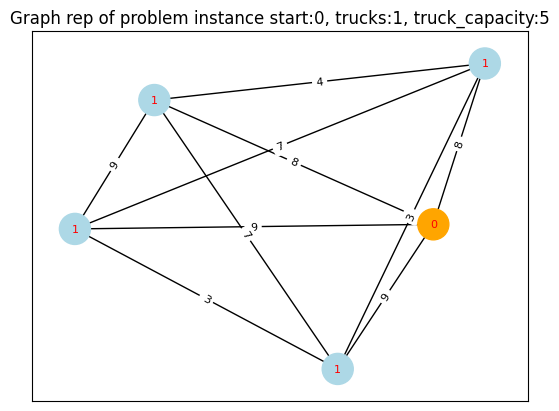

instance of the example:
TSP problem, start=0, adjacency:
 0  10  15  20
10   0  35  25
15  35   0  30
20  25  30   0
Instance of our problem: 
start=0, truck_count=1, truck_capacity=4
demands: 
0, 1, 1, 1
adjacency: 
 0  10  15  20
10   0  35  25
15  35   0  30
20  25  30   0


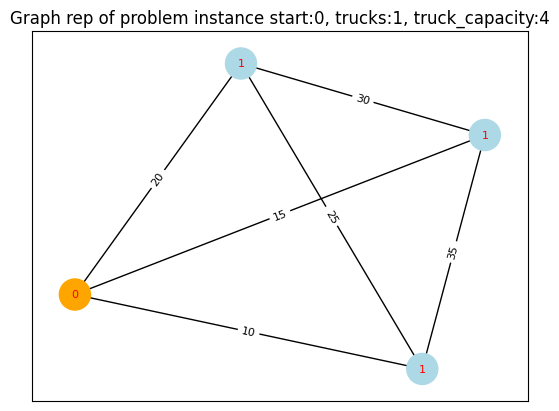

In [ ]:
class TSPInstance:
    def __init__(self, adjacency: Iterable[Iterable[int]], start: int):
        self.adjacency = adjacency
        self.start = start

    def as_our_problem(self) -> Problem:
        return Problem(self.adjacency, self.start, 1, len(self.adjacency), tuple((1 if i != self.start else 0) for i in range(len(self.adjacency))))

    @classmethod
    def random(cls, vertex_count, max_cost) -> 'TSPInstance':
        return cls(random_adjacency_matrix(vertex_count, max_cost), _random.randint(0, vertex_count - 1))

    def __str__(self):
        return f"TSP problem, start={self.start}, adjacency:\n{str_adjacency_matrix(self.adjacency)}"



# generate a random TSP instance
tsp_instance = TSPInstance.random(5, 10)

print("random instance")
print(tsp_instance)

# reduce that instance to an instance of our problem
our_problem = tsp_instance.as_our_problem()

print(our_problem)
plot_instance(our_problem)


# do the same with our example instance:

tsp_instance = TSPInstance((
    (0, 10, 15, 20),
    (10, 0, 35, 25),
    (15, 35, 0, 30),
    (20, 25, 30, 0),
), start=0)

print("instance of the example:")

print(tsp_instance)

our_problem = tsp_instance.as_our_problem()

print(our_problem)
plot_instance(our_problem)



Thus we have reduced TSP to an instance of our problem and proved that our problem is at least as hard as TSP, which is NP-Hard. This shows us that we will not be able to solve our problem deterministicly in a reasonable amount of time when provided large instances.

Such a result leaves us with the only choice of relying on a heuristic approach to approximate the best solution for very large instances.

## Heuristic approach

A simple heuristic will not be enough to find a sufficiently good solution to our problem, as it could very easily get stuck at local optima, instead of reaching the global optimum.

This is why we will use a metaheuristic approach. This will, however, require fine-tuning of some parameters to adapt the approach to our problem. This tuning must be done relative to an upper bound, which can be obtained through Integer Linear Programming.

<br>

### Integer Linear Programming Model (ILP)

We modeled our problem as an ILP problem in the following way:

<strong> Decision variables </strong>:
  
  - $V$ is the set of vertices
  - $K$ is number of available trucks
  - $T$ is the set of trucks {$0,1,..., K-1$}
  - $c {\scriptscriptstyle ij} $ is the cost of edge connecting vertices $i$ and $j$
  - $R$ is the capacity of a truck
  - $d {\scriptscriptstyle i} $ is the demand of vertex $v{\scriptscriptstyle i}$
  - $x {\scriptscriptstyle ijk} = \begin{cases} \text{1 if truck $k$ travels from $i$ to $j$} \\ \text{0 otherwise} \end{cases} $


<strong> Constraints: </strong>
  * let $W$ be $V \setminus \{0\}$
  


  * The sum of the demands at the vertices traversed by a truck shouldn't exceed the capacity of a truck
  $$R \geq \sum_{i \in V} \sum_{j \in V} d_{\scriptscriptstyle i} x_{\scriptscriptstyle ijk} \quad \forall k \in T$$

  * Each vertex must be left by exactly one truck, except for the depot.
  $$ \sum_{k \in T} \sum_{j \in V} x_{\scriptscriptstyle ijk} = 1 \quad \forall i \in W $$

  * Each vertex must be entered by exactly one truck, except for the depot.
  $$\sum_{k \in T} \sum_{i \in V} x_{\scriptscriptstyle ijk} = 1 \quad \forall j \in W$$

  * Each truck must enter the depot exactly once. Implies that all trucks must be used.
  $$\sum_{i \in V} x_{\scriptscriptstyle i0k} = 1 \quad \forall k \in T$$

  * Each truck must leave the depot exactly once. Implies that all trucks must be used.
  $$ \sum_{j \in V} x_{\scriptscriptstyle 0jk} = 1 \quad \forall k \in T$$

  * $x_{\scriptscriptstyle ijk}$ must be a 3-dimensional matrix of boolean values.
  $$ x_{\scriptscriptstyle ijk} \in \left\{0;1\right\} \quad \forall (i,j) \in V^2; \forall k \in T $$
    
<strong> Objective: </strong>

  minimize $f(V, K, T, c {\scriptscriptstyle ij}, R, d {\scriptscriptstyle i}, x {\scriptscriptstyle ijk}) = \sum_{k=0}^{K-1} \sum_{i \in V} \sum_{j \in V} c {\scriptscriptstyle ij}.x {\scriptscriptstyle ijk}$

<br>

### Metaheuristic approach

The metaheuristic approach we decided to use is Simulated Annealing.

It belongs to a category of metaheuristics called "trajectory-based", where approaches traverse the solution space neighbour by neigbour iteratively, slowly advancing towards a solution.

This algorithm takes as an input an initial "temperature", as well as temperature variation factor. At each iteration, it will choose:
- a more optimal solution than the current one with 100% probability
- a less optimal solution than the current one with a probability of the form $exp(\Delta f / T)$,  where $f$ is the function we are attempting to optimise.

In our case, we have $f$ being the sum of the total costs of each truck's path.

# III. Implementation


## Problem instance

We implemented instances of the problem in the following way:

Instance of our problem: 
start=73, truck_count=88, truck_capacity=55
demands: 
4, 3, 1, 2, 5, 5, 4, 2, 4, 2, 4, 1, 1, 1, 5, 4, 3, 4, 4, 2, 3, 4, 2, 3, 4, 2, 5, 1, 5, 3, 1, 5, 5, 2, 5, 2, 1, 5, 3, 3, 4, 4, 4, 2, 4, 2, 3, 4, 1, 1, 5, 1, 1, 5, 2, 3, 2, 5, 2, 1, 5, 4, 2, 2, 5, 1, 5, 5, 5, 1, 4, 1, 4, 0, 1, 5, 5, 1, 5, 5, 2, 2, 5, 4, 5, 5, 1, 4, 3, 5, 1, 1, 2, 5, 5, 4, 5, 3, 1, 1
adjacency: 
 0   3  13   3  12   7  10   3   7  14  13  11   8   1  12   6   8  12   9   6   9   6  11   8   4   3   6   2  14   6  13  11  13   4   4   9   1   4  11   8   6  12   1   9   4  12  14  14   5  10   9   4   4  10   5  11   6   6  14   7   9  11  10   3   2   2   3  13   1  15   7  11   8  13  13   1  15   2   5   5  15   5  15  10   5  11  12   6  11  12   5  12  13   7  14  13   8   8   6  13
 3   0  13  15   7   8  12   1  10   8   7  13   5  10   2  14  10   3   8   1   7   5   6  15  15  13   1  11  12   5   2  10   9   9   5  13   7   5  13   6   7   8   3   6  10  15  11   6   1  11  15  13   6

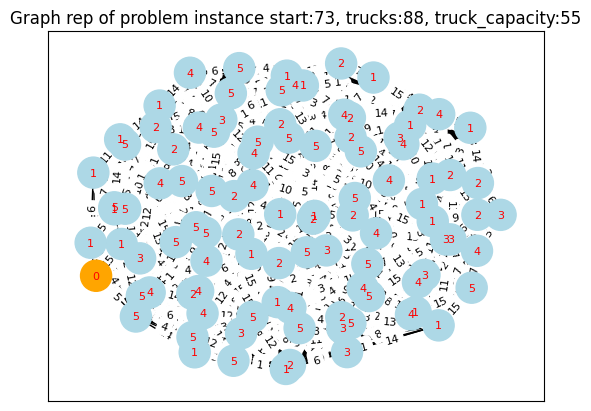

In [ ]:
"""
Implementation of the representation of an instance of the problem
"""

import random as _random
from collections.abc import Iterable, Callable, Generator


def create_adjacency_matrix(size: int, cb: Callable[[int, int, object], int]) -> Iterable[Iterable[int]]:
    """
    Function that creates an adjacency matrix for a graph with 'size' vertices.
    Each cell at [i, j] in the matrix has its value set iteratively to the result of calling 'cb(i, j, adj)'.
    """
    adjacency = []

    for i in range(size):
        adjacency.append([])
        for j in range(size):
            value = cb(i, j, adjacency)
            adjacency[-1].append(value)

    return adjacency


def random_adjacency_matrix(size: int, max_cost: int, directed: bool = False) -> Iterable[Iterable[int]]:
    """
    Randomly generate an adjacency matrix for a complete graph of 'size' vertices,
    limiting the cost of edges to 'max_cost'.
    """
    def _callback(i, j, adj):
        """
        Called by 'create_adjacency_matrix' for each cell in the matrix.
        """
        # diagonal should be zeroes
        if j == i:
            return 0
        # matrix should be symmetrical if graph is undirected
        if (j < i) and (not directed):
            return adj[j][i]
        return _random.randint(1, max_cost)

    return create_adjacency_matrix(size, _callback)


def str_adjacency_matrix(matrix: Iterable[Iterable[int]]) -> str:
    max_lengths = [0 for _ in range(len(matrix[0]))]
    for j in range(len(matrix)):
        row = matrix[j]
        for i in range(len(row)):
            length = len(str(row[i]))
            if length > max_lengths[i]:
                max_lengths[i] = length

    return '\n'.join(('  '.join(str(row[i]).rjust(max_lengths[i]) for i in range(len(row)))) for row in matrix)


newline = '\n'

_random.seed(1955807)

class Problem:
    def __init__(self, adjacency: Iterable[Iterable[int]], start: int, truck_count: int, truck_capacity: int, demands: Iterable[int]):
        """
        Constructor.
        Our problem is represented as follows:
        - 'adjacency' is the adjacency matrix for our graph as a mutable list of lists. It contains the weights of the different edges
        - 'start' is the index of the starting point
        - 'truck_count' is the number of trucks available
        - 'truck_capacity' is the capacity of a truck
        - 'demands' stores the weight of each vertex in the graph in the form of an immutable list
        """
        self.adjacency = adjacency
        self.start = start
        self.truck_count = truck_count
        self.truck_capacity = truck_capacity
        self.demands = demands

        # cache the feasibility of solutions:
        self.feasibilities = {}

    @classmethod
    def random(cls, vertex_count: int, max_cost: int, max_demand: int, max_truck_count: int, max_truck_capacity: int) -> 'Problem':
        """
        Randomly generates an instance of the problem, given a maximum for the relevant properties.
        weights, demands and number of trucks have a minimum of 1,
        start has a minimum of 0
        """
        # if the number of trucks exceeds the number of vertices, the problem becomes unsolvable because all trucks must be used
        if max_truck_count > vertex_count:
            max_truck_count = vertex_count

        # generate the adjacency list
        adjacency = random_adjacency_matrix(vertex_count, max_cost)

        # starting point
        start = _random.randint(0, vertex_count - 1)

        # number of trucks, 0 trucks doesn't make sense
        truck_count = _random.randint(1, max_truck_count)

        # demands for each vertex, a demand of 0 would be the same as the vertex not being in the graph
        # the starting point must have a demand of 0
        demands = tuple((_random.randint(1, max_demand) if i != start else 0) for i in range(vertex_count))

        # if the truck capacity is smaller than the most demanding vertex, the
        # problem is never solvable so we exclude this case
        min_truck_capacity = max(demands)
        truck_capacity = _random.randint(min_truck_capacity, max_truck_capacity)

        # returning the actual instance of our problem
        return cls(adjacency, start, truck_count, truck_capacity, demands)

    def might_have_feasible_solutions(self) -> bool:
        """
        Whether the problem can have a non-empty feasible solution space.
        If False is returned, it is certain that the problem has an empty
        feasible solution space.
        If True is returned, the problem's feasible solution space might or
        might not be empty.
        """
        # if there are more trucks than delivery points, using all the trucks requires
        # at least one node to be traversed by more than one truck, rendering the problem
        # unsolvable
        if self.truck_count >= len(self.adjacency):
            return False

        # if there's not enough overall truck capacity to satisfy the overall demand, then the problem is unsolvable.
        if sum(self.demands) > (self.truck_count * self.truck_capacity):
            return False
        # PLACE OTHER GLOBAL FEASIBILITY CONDITIONS HERE
        return True

    def __hash__(self):
        """
        Make this type hashable so we can use it in sets and as keys of
        dictionaries. Instances are not supposed to be modified
        after creation.
        """
        return hash((self.adjacency, self.start, self.truck_count, self.demands, self.truck_capacity))

    def __str__(self):
        """
        Defines how an instance of the problem should be represented as a string.
        """
        str_adj = str_adjacency_matrix(self.adjacency)
        return (f"Instance of our problem: \nstart={self.start}, truck_count={self.truck_count}, truck_capacity={self.truck_capacity}\n"
                + f"demands: \n{', '.join(str(i) for i in self.demands)}\nadjacency: \n{str_adj}"
                )


# generate a random instance of our problem:
instance = Problem.random(100, 15, 5, 97, 73)
print(instance)
plot_instance(instance)


## Problem solution space

Here is how we implemented the code for a potential solution to our problem:



In [ ]:
class Solution:
    """
    Represents a solution a specific instance of the problem.
    Stores the path of each truck in a tuple. Each path tuple does
    not store the depot, as this class implicitly interprets paths
    as starting and ending at the depot. Thus, only the intermediary
    nodes are to be specified.
    """

    def __init__(self, problem: Problem, paths: Iterable[Iterable[int]]):
        self.problem = problem  # the instance of the problem of which the current object is a solution
        # make sure our paths are tuples so they are hashable. This is required for caching.
        self.paths = tuple(tuple(p) for p in paths)

    def get_max_total_cost(self) -> int:
        """
        Return the total cost of the most costly path in this solution.
        This is the value that we are attempting to minimise.
        """

        max_total_cost = 0

        for truck_id in range(len(self.paths)):
            truck_path = (self.problem.start, *self.paths[truck_id], self.problem.start)

            total_cost = sum(self.problem.adjacency[truck_path[i]][truck_path[i-1]] for i in range(1, len(truck_path)))

            if total_cost > max_total_cost:
                max_total_cost = total_cost

        return max_total_cost

    def _is_feasible(self) -> bool:
        """
        Non-cached feasibility check for solutions to the problem
        """
        # when we are sure there is no feasible solution, avoid performing the
        # rest of the checks for performance reasons
        if not self.problem.might_have_feasible_solutions():
            return False

        # there should be one path per truck
        if len(self.paths) != self.problem.truck_count:
            return False

        found_vertices = set()

        for path in self.paths:
            # the starting point should not appear in the path, as its location in the path is implicit
            if self.problem.start in path:
                return False

            # all paths should have a total cost of at most the capacity of a truck
            total_demand = sum(self.problem.demands[n] for n in path)
            if total_demand > self.problem.truck_capacity:
                return False

            # no vertex should be visited more than once (except the depot)
            for vertex in path:
                if vertex in found_vertices:
                    return False
                found_vertices.add(vertex)

        # all vertices should be visited at least once
        if len(found_vertices) != len(self.problem.adjacency) - 1:
            return False

        return True

    def is_feasible(self) -> bool:
        """
        Wrapper around the feasibility check that caches its result.
        Returns True if the solution is within the feasible solution
        space of its problem.
        """
        # when we are sure there is no feasible solution, avoid performing the
        # rest of the checks for performance reasons
        if not self.problem.might_have_feasible_solutions():
            return False
        if self.paths not in self.problem.feasibilities:
            self.problem.feasibilities[self.paths] = self._is_feasible()
        return self.problem.feasibilities[self.paths]

    def _traverse(self) -> Generator[tuple[int, int], None, None]:
        """
        Generator that yields indices of each vertex in each truck path of the solution.
        Serves as a helper function for the swapping mechanism.
        """
        for truck_id in range(len(self.paths)):
            for vertex_pos in range(len(self.paths[truck_id])):
                yield (truck_id, vertex_pos)

    def _get_swap(self, truck_id_a, vertex_id_a, truck_id_b, vertex_id_b) -> 'Solution':
        """
        Produces a copy of the current solution, where vertices a and b are swapped.
        The user provides a truck id and a vertex id for both a and b.
        """
        result = [[] for i in range(len(self.paths))]

        for truck_id, vertex_pos in self._traverse():
            if (truck_id == truck_id_a) and (vertex_pos == vertex_id_a):
                result[truck_id].append(self.paths[truck_id_b][vertex_id_b])
                continue
            if (truck_id == truck_id_b) and (vertex_pos == vertex_id_b):
                result[truck_id].append(self.paths[truck_id_a][vertex_id_a])
                continue
            result[truck_id].append(self.paths[truck_id][vertex_pos])
        return Solution(self.problem, result)

    def _find_all_swaps(self, source_truck_id, source_vertex_pos) -> 'Generator[Solution]':
        """
        Generator that yields a copy of the paths for every possible swap of the provided vertex.
        """
        to_traverse = list(self._traverse())
        _random.shuffle(to_traverse)
        for truck_id, vertex_pos in to_traverse:
            if (truck_id == source_truck_id) and (vertex_pos == source_vertex_pos):
                continue

            yield self._get_swap(source_truck_id, source_vertex_pos, truck_id, vertex_pos)

    def list_neighbours(self) -> 'Generator[Solution]':
        """
        GOD this can be swapped in so many different ways!!!
        Yields all the feasible neighbours of the current solution.
        This is done by going through all possible swap combinations of the
        current solution's paths and picking only the ones that are feasible.
        """
        for truck_id, vertex_pos in self._traverse():
            for swap in self._find_all_swaps(truck_id, vertex_pos):
                if swap.is_feasible():
                    yield swap
        return ()

    @classmethod
    def random(cls, problem):
        """
        Return a randomly generated solution
        """

        # list of vertices that haven't been visited yet
        available = list(range(len(problem.adjacency)))

        # remove the starting point if present
        try:
            available.pop(available.index(problem.start))
        except ValueError:  # raised by available.index() if the item is not found
            pass

        # paths for the result
        paths = []

        # for each truck, we generate a random path based on the vertices that have not been visited yet
        for i in range(problem.truck_count):
            # number of trucks that still need a path to be assigned a path. Used to make sure all trucks have at least one node to visit
            remaining_trucks = problem.truck_count - i - 1
            path = []  # actual path
            randomisation_margin = len(
                available) - remaining_trucks  # maximum number of nodes allowed for this truck, based on the number of remaining trucks

            # number of nodes that this truck will visit
            n_nodes_used = _random.randint(1, randomisation_margin)

            # choose a random set of nodes amongst the ones that are still available
            for _ in range(n_nodes_used):
                index = _random.randint(0, len(available) - 1)
                path.append(available[index])
                available.pop(index)  # node has been visited, it is no longer available

            paths.append(path)

        # if some nodes are not assigned to the trucks, assign
        # them to the last truck so we are sure all nodes are visited.
        paths[-1].extend(available)

        return Solution(problem, paths)

    @property
    def full_paths(self):
        """
        The list of paths contained in the current solution, including the depot.
        """
        return tuple(self.full_path(truck) for truck in range(self.problem.truck_count))

    def full_path(self, truck_number):
        """
        Return the path of the provided truck according to the solution.
        """
        return self.problem.start, *self.paths[truck_number], self.problem.start

    def __eq__(self, other):
        if not isinstance(other, Solution):
            return False
        if self.problem != other.problem:
            return False
        return self.paths == other.paths


    def __hash__(self):
        """
        Make this type hashable so we can use it in sets and as keys of
        dictionaries. Instances are not supposed to be modified
        after creation.
        """
        return hash((self.problem, self.paths))

    def __str__(self):
        """
        Defines how a solution to the problem should be represented as a string.
        """
        nl = '\n'
        str_paths = []
        for i in range(len(self.full_paths)):
            path = self.full_paths[i]
            str_paths.append(f"Truck {i}: " + '=>'.join(str(node) for node in path))
        return f"Solution to a routing problem:\n {nl.join(str_paths)}"


##Integer Linear Programming

When trying to solve optimization problem in programming, you must find the right algorithm for the task. One such category of algorithms is solvers. Solvers are a type of mathematical programs whose sole purpose is to solve or optimize problems that are represented by a series of equations.

Integer Linear Programming (ILP) is a mathematical optimization technique used to find the best possible solution to a problem where the objective function and constraints are linear, but some or all decision variables are required to be integers (binary variables).

In our context, it can be used to:

*  _Obtain initial solution for a metaheuristic algorithm_
*   _Find optimal solution if the problem is small enough to be solved exactly_

### How ILP will work for our problem
For our problem, the goal is to find the optimal routes for a fleet of trucks that minimizes the total distance travelled while respecting constraints such as:


1.   Each node must be visited exactly once.
2.   Each truck must start and end at the depot.
3. Each truck has a capacity limit that must not be exceeded.

### Steps to extract the initial solution

**This kickstarts a metaheuristic algorithm, allowing it to explore nearby solutions based on feasible and near-optimal starting point.**


1.   Solve ILP model using a solver e.g. Pulp or CPLEX

2.   Extract routes from the ILP solution by checking the values of the binary decision variables.
3. Create routes based on binary variables. Starting from depot, use the decision variables to trace the path by each truck.

###Getting the optimal solution


*   _For small and medium-sized instances of VRP, ILP solvers can explore all possible combinations efficiently and guarantee that the solution fourn is the best possible._
*   _For large-scale instances of VRPs using ILP, it can be computationally expensive. The solution time grows exponentially with number of nodes, trucks and constraints. Thus, a metaheuristic like Simulated annealing can be used._


In [ ]:
!pip install pulp
from pulp import LpProblem, LpMinimize, LpVariable, lpSum, LpBinary, value, LpStatus, PULP_CBC_CMD
import numpy as np

def solve_vrp_ilp(problem: Problem):
    num_nodes = len(problem.adjacency)
    depot = problem.start
    demands = problem.demands
    capacity = problem.truck_capacity
    trucks = problem.truck_count
    adjacency_matrix = np.array(problem.adjacency)


    V = range(num_nodes)
    W = range(1, num_nodes)
    T = range(trucks)

    # Initialize the VRP ILP problem
    problem = LpProblem("VRP_ILP", LpMinimize)

    # Decision variables: x[i][j][k] = 1 if truck k travels from i to j
    x = LpVariable.dicts("x", ((i, j, k) for i in V for j in V for k in T), cat=LpBinary)

    # Sequential order variables: u[i][k] = position of i in the route of truck k
    u = LpVariable.dicts("u", ((i, k) for i in W for k in T), lowBound=0, upBound=num_nodes-1, cat='Integer')

    # Objective function: Minimize total distance traveled
    problem += lpSum(adjacency_matrix[i][j] * x[i, j, k] for i in V for j in V for k in T), "Total_Distance"

    # Capacity constraints for each truck
    for k in T:
        problem += lpSum(demands[i] * x[i, j, k] for i in W for j in V) <= capacity, f"Truck_Capacity_{k}"

    # Each node must be left exactly once (customer nodes only)
    for i in W:
        problem += lpSum(x[i, j, k] for k in T for j in V) == 1, f"Leave_Node_{i}"

    # Each node must be entered exactly once (customer nodes only)
    for j in W:
        problem += lpSum(x[i, j, k] for k in T for i in V) == 1, f"Enter_Node_{j}"

    # Depot constraints: Each truck must enter and leave the depot exactly once
    for k in T:
        problem += lpSum(x[0, j, k] for j in W) == 1, f"Leave_Depot_{k}"  # Each truck leaves the depot
        problem += lpSum(x[i, 0, k] for i in W) == 1, f"Enter_Depot_{k}"  # Each truck returns to the depot

    # Subtour elimination: u[i] represents the position of i in the route of truck k
    for k in T:
        for i in W:
            for j in W:
                if i != j:
                    problem += u[i, k] - u[j, k] + (num_nodes - 1) * x[i, j, k] <= num_nodes - 2, f"Subtour_Elimination_{i}_{j}_{k}"

    # Solve the problem
    problem.solve(PULP_CBC_CMD(timeLimit=200))
    print("Solver Status:", LpStatus[problem.status])  # Print solver status

    if problem.status == 1:
        lower_bound = value(problem.objective)
        print("Objective (Total Distance):", lower_bound)

    else:
        lower_bound = None
        print("No feasible solution found.")

    return lower_bound

# Assuming an instance of ProblemInstance class
lower_bound = solve_vrp_ilp(instance)
print("ILP Lower Bound:", lower_bound)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 29.8 MB/s eta 0:00:00
Solver Status: Optimal
Objective (Total Distance): 1322.0
ILP Lower Bound: 1322.0


## Brute force

Here is how we implemented the brute force algorithm for our problem:

In [ ]:
def bruteforce(initial_solution: Solution):
    """
    Recursively determine the solution to our problem using
    the bruteforce technique.
    """

    # maintain a set of already visited solutions
    visited = {initial_solution}

    # keep track of the best solution found so far
    best_solution = initial_solution
    best_cost = initial_solution.get_max_total_cost()

    def _recursion(solution: Solution):
        nonlocal best_cost, best_solution

        # go through all neighbours of solution
        for neighbour in solution.list_neighbours():
            if neighbour in visited:
                # we have already visited that neighbour solution
                continue
            # register the neighbour as having been visited
            visited.add(neighbour)

            # update the best solution
            cost = neighbour.get_max_total_cost()
            if cost < best_cost:
                best_solution = neighbour
                best_cost = cost

            _recursion(neighbour)

    # start the recursion
    _recursion(initial_solution)

    return best_solution

## Simulated Annealing
The following is how we implemented integer linear programming. This implementation was inspired by [10].

In [ ]:

# simple helpers that allow easily toggling on or off the console
# output of the solver, for readability
import warnings
DEBUG = True

def debug_print(*values, sep=" ", end="\n", file=None, flush=False):
    if DEBUG:
        print(*values, sep=sep, end=end, file=file, flush=flush)


class SimulatedAnnealingSolver:
    """
    Class that finds approximate solutions to instances of our problem using the simulated annealing algorithm.
    """

    def __init__(self, initial_temperature, temperature_factor, debug_func=lambda sol, cost, accepted: None, max_iterations=100, temperature_threshold=1e-5):
        self.temp = initial_temperature
        self.temp_factor = temperature_factor
        self.current_solution: Solution | None = None
        self.debug_func = debug_func
        self.max_iterations = max_iterations
        self.temp_thresh = temperature_threshold
        self.iterations = 0

    def needs_terminate(self) -> bool:
        """
        Returns True if the terminating condition is met.
        """
        if self.temp <= self.temp_thresh:
            return True
        if self.iterations >= self.max_iterations:
            return True
        return False  # placeholder

    def does_select_neighbour(self, neighbour: Solution) -> bool:
        """
        Return whether a neighbour should be selected as the new current solution.
        """
        # if the new solution is better than the current solution, it is immediately accepted
        diff = self.current_solution.get_max_total_cost() - neighbour.get_max_total_cost()
        if diff > 0:  # we want to minimize the costs
            debug_print("neighbour has a lower cost than the current solution")
            return True

        # if the solution isn't, we accept it with a certain probability.
        # a solution that is equal to the current solution has a probability of 1
        # of being selected.
        r = _random.random()
        debug_print("falling back to randomness")
        return r < np.exp(diff / self.temp)

    def next_solution(self):
        """
        Return the solution that should be the new current solution.
        If no new solutions are found, the current solution is returned.
        """
        self.iterations += 1
        # find a neighbour of the current solution that is within the feasible solution space
        for solution in self.current_solution.list_neighbours():
            debug_print(f"found neighbour {solution.paths} with cost {solution.get_max_total_cost()}")
            accepted = self.does_select_neighbour(solution)
            if accepted:
                debug_print("accepted that neighbour")
            # we call the callback that has been set up to keep track of the solver's behaviour.
            self.debug_func(solution, solution.get_max_total_cost(), accepted)
            if accepted:
                return solution
        return self.current_solution

    def solve(self, initial_solution: Solution) -> Solution:
        """
        Solve the instance of our problem associated with the provided initial solution, using
        simulated annealing.
        """
        self.current_solution = initial_solution

        # if the problem can be determined to be unsolvable, don't try to solve it.
        if not initial_solution.problem.might_have_feasible_solutions():
            warnings.warn("The provided problem is not solvable", RuntimeWarning)
            return initial_solution

        # keep trying to find new solutions in the neighbourhood of the current solution
        # until the terminating conditions are met.
        while True:
            if self.needs_terminate():
                debug_print("terminating conditions were met, ending the algorithm")
                break
            self.current_solution = self.next_solution()
            self.temp /= self.temp_factor

        return self.current_solution


## Statistical study


Instance of our problem: 
start=2, truck_count=5, truck_capacity=50
demands: 
4, 10, 0, 24, 10, 41, 20
adjacency: 
 0   3   5   8  14   7  14
 3   0   1  11   5   6  14
 5   1   0  10  15   2   4
 8  11  10   0   8  14   8
14   5  15   8   0   7  15
 7   6   2  14   7   0   7
14  14   4   8  15   7   0


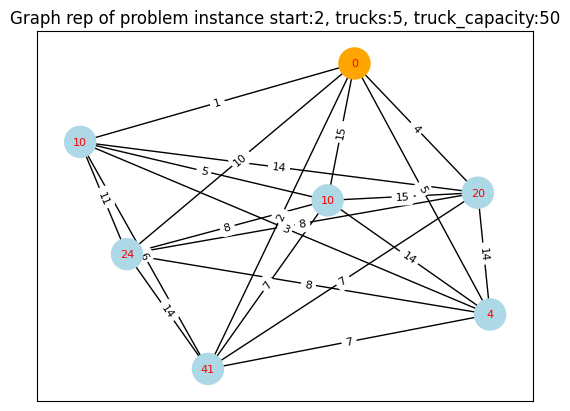

initial solution:
paths=((2, 3, 2), (2, 1, 6, 2), (2, 0, 2), (2, 4, 2), (2, 5, 2))
cost=30
feasible=True
starting solver...
found neighbour ((4,), (1, 6), (0,), (3,), (5,)) with cost 30
falling back to randomness
accepted that neighbour
found neighbour ((1,), (4, 6), (0,), (3,), (5,)) with cost 34
falling back to randomness
accepted that neighbour
found neighbour ((6,), (4, 1), (0,), (3,), (5,)) with cost 21
neighbour has a lower cost than the current solution
accepted that neighbour
found neighbour ((5,), (4, 1), (0,), (3,), (6,)) with cost 21
falling back to randomness
accepted that neighbour
found neighbour ((0,), (4, 1), (5,), (3,), (6,)) with cost 21
falling back to randomness
accepted that neighbour
found neighbour ((5,), (4, 1), (0,), (3,), (6,)) with cost 21
falling back to randomness
accepted that neighbour
found neighbour ((3,), (4, 1), (0,), (5,), (6,)) with cost 21
falling back to randomness
accepted that neighbour
found neighbour ((1,), (4, 3), (0,), (5,), (6,)) with cost 

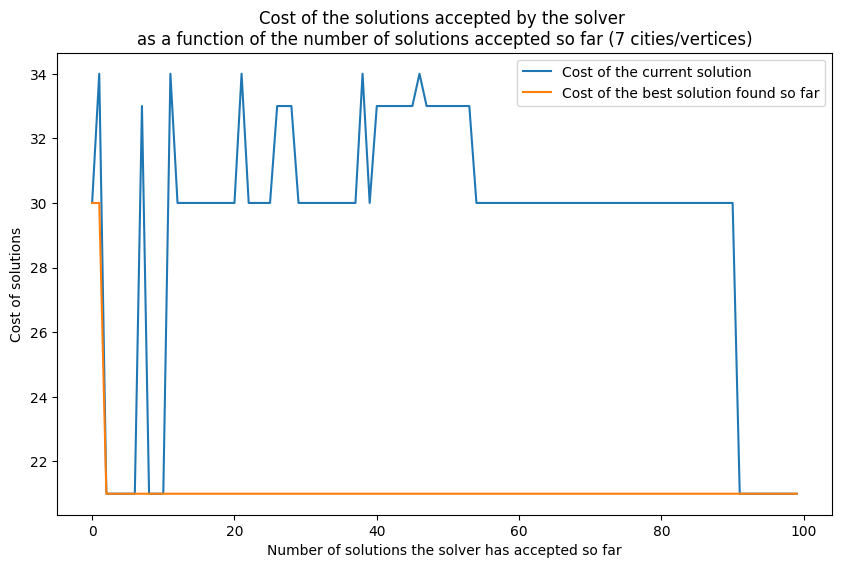

In [ ]:
# seeds:
# small instance (7 vertices): 3806235; problem arguments (vertex_count=7, max_cost=15, max_demand=50, max_truck_count=6, max_truck_capacity=60)
# medium instance (20 vertices): 2979170 (vertex_count=20, max_cost=15, max_demand=5, max_truck_count=5, max_truck_capacity=40)
# large instance (100 vertices): 1955807 (vertex_count=100, max_cost=15, max_demand=5, max_truck_count=97, max_truck_capacity=73)
DEBUG = True

def test(problem):
    costs = []
    best_costs = [int(1e9)]  # very large value to mimic integer infinity

    def measure(sol, cost, accepted):
        """
        Callback that keeps track of the behaviour of the solver.
        Is called by said solver each time a new potential solution is
        encountered.
        """
        nonlocal costs
        if accepted:
            # keep track of current solution's cost and of best cost encountered so far
            costs.append(cost)
            best = min(best_costs[-1], cost)
            best_costs.append(best)

    init_sol = Solution.random(problem)

    print("initial solution:")
    print(f"paths={init_sol.full_paths}")
    print(f"cost={init_sol.get_max_total_cost()}")
    print(f"feasible={init_sol.is_feasible()}")

    solver = SimulatedAnnealingSolver(
        initial_temperature=500, temperature_factor=1.1, max_iterations=100, debug_func=measure
    )

    print("starting solver...")
    solver_solution = solver.solve(init_sol)
    print("solver is done.")

    if solver_solution.is_feasible():
        print("solver's solution:")
        print(f"paths={solver_solution.full_paths}")
        print(f"cost={solver_solution.get_max_total_cost()}")
        print(f"feasible={solver_solution.is_feasible()}")
    else:
        print(f"The solver didn't end on a feasible solution.")

    best_costs.pop(0)

    return costs, best_costs


def plot_costs(costs, best_costs, vertex_count):
    if len(costs) and len(best_costs):
        plt.figure(figsize=(10, 6))
        plt.title(f"Cost of the solutions accepted by the solver \nas a function of the number of solutions accepted so far ({vertex_count} cities/vertices)")
        plt.xlabel("Number of solutions the solver has accepted so far")
        plt.ylabel("Cost of solutions")
        plt.plot(costs, label='Cost of the current solution')
        plt.plot(best_costs, label='Cost of the best solution found so far')
        plt.legend(loc='upper right')
        plt.show()


def problem_from_seed(seed, vertex_count, max_cost, max_demand, max_truck_count, max_truck_capacity):
    _random.seed(seed)
    return Problem.random(vertex_count, max_cost, max_demand, max_truck_count, max_truck_capacity)



example_small_problem = problem_from_seed(3806235,
    vertex_count=7, max_cost=15, max_demand=50, max_truck_count=6, max_truck_capacity=60
)

print(example_small_problem)

plot_instance(example_small_problem)
plot_costs(*test(example_small_problem), 7)

Instance of our problem: 
start=2, truck_count=4, truck_capacity=38
demands: 
1, 1, 0, 2, 4, 2, 2, 5, 1, 3, 4, 4, 5, 4, 2, 5, 4, 1, 1, 5
adjacency: 
 0  14   9   5  11   8   6  13  14  15  13   3  11   7   1  15  10   2   2   4
14   0  15   5  15   7   1  10  15   2   9   5  13   7   8   9  11  15  15  15
 9  15   0  12  12  12  11   5   5  15  10  14  14  15  13  14   4  10   9   1
 5   5  12   0   8   2   5  10   1   4  12  14   1   3   5   2   8  10   8  13
11  15  12   8   0  14   3  10   4   9   4  11   1   1  14   1   3   5  13   4
 8   7  12   2  14   0   6   6  12   1   1  11   2   9   9  14   1  10  12  14
 6   1  11   5   3   6   0  11   1   6  10   9  13  15   1   3   2   9  13  14
13  10   5  10  10   6  11   0   1   3   1  15   1   5   3  10   5  15   6  10
14  15   5   1   4  12   1   1   0   9   3   4   2  14  10  11   1   7   8   4
15   2  15   4   9   1   6   3   9   0   9   8   2   6   5   9  12  11  12   6
13   9  10  12   4   1  10   1   3   9   0   7  14   5  12   

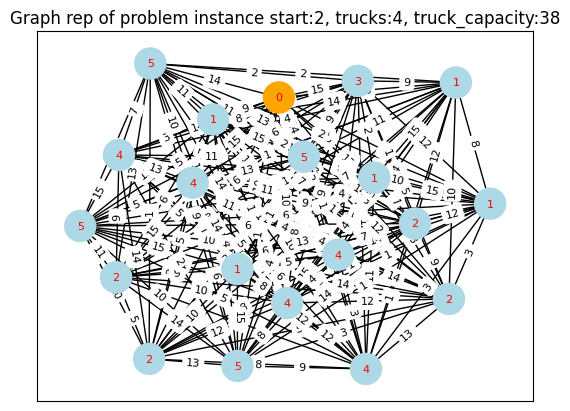

initial solution:
paths=((2, 15, 0, 5, 14, 16, 2), (2, 8, 18, 6, 3, 4, 19, 9, 13, 12, 17, 11, 7, 2), (2, 1, 2), (2, 10, 2))
cost=91
feasible=True
starting solver...
found neighbour ((19, 0, 5, 14, 16), (8, 18, 6, 3, 4, 15, 9, 13, 12, 17, 11, 7), (1,), (10,)) with cost 91
falling back to randomness
accepted that neighbour
found neighbour ((5, 0, 19, 14, 16), (8, 18, 6, 3, 4, 15, 9, 13, 12, 17, 11, 7), (1,), (10,)) with cost 91
falling back to randomness
accepted that neighbour
found neighbour ((18, 0, 19, 14, 16), (8, 5, 6, 3, 4, 15, 9, 13, 12, 17, 11, 7), (1,), (10,)) with cost 88
neighbour has a lower cost than the current solution
accepted that neighbour
found neighbour ((4, 0, 19, 14, 16), (8, 5, 6, 3, 18, 15, 9, 13, 12, 17, 11, 7), (1,), (10,)) with cost 97
falling back to randomness
accepted that neighbour
found neighbour ((14, 0, 19, 4, 16), (8, 5, 6, 3, 18, 15, 9, 13, 12, 17, 11, 7), (1,), (10,)) with cost 97
falling back to randomness
accepted that neighbour
found neighbour ((1

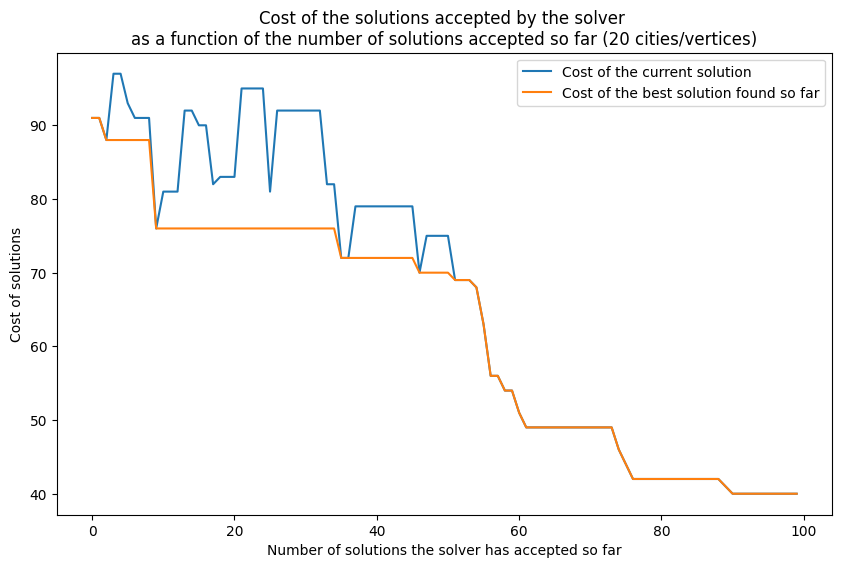

In [ ]:
example_medium_problem = problem_from_seed(2004145,
    vertex_count=20, max_cost=15, max_demand=5, max_truck_count=5, max_truck_capacity=40
)

print(example_medium_problem)

plot_instance(example_medium_problem)
plot_costs(*test(example_medium_problem), 20)

Instance of our problem: 
start=73, truck_count=88, truck_capacity=55
demands: 
4, 3, 1, 2, 5, 5, 4, 2, 4, 2, 4, 1, 1, 1, 5, 4, 3, 4, 4, 2, 3, 4, 2, 3, 4, 2, 5, 1, 5, 3, 1, 5, 5, 2, 5, 2, 1, 5, 3, 3, 4, 4, 4, 2, 4, 2, 3, 4, 1, 1, 5, 1, 1, 5, 2, 3, 2, 5, 2, 1, 5, 4, 2, 2, 5, 1, 5, 5, 5, 1, 4, 1, 4, 0, 1, 5, 5, 1, 5, 5, 2, 2, 5, 4, 5, 5, 1, 4, 3, 5, 1, 1, 2, 5, 5, 4, 5, 3, 1, 1
adjacency: 
 0   3  13   3  12   7  10   3   7  14  13  11   8   1  12   6   8  12   9   6   9   6  11   8   4   3   6   2  14   6  13  11  13   4   4   9   1   4  11   8   6  12   1   9   4  12  14  14   5  10   9   4   4  10   5  11   6   6  14   7   9  11  10   3   2   2   3  13   1  15   7  11   8  13  13   1  15   2   5   5  15   5  15  10   5  11  12   6  11  12   5  12  13   7  14  13   8   8   6  13
 3   0  13  15   7   8  12   1  10   8   7  13   5  10   2  14  10   3   8   1   7   5   6  15  15  13   1  11  12   5   2  10   9   9   5  13   7   5  13   6   7   8   3   6  10  15  11   6   1  11  15  13   6

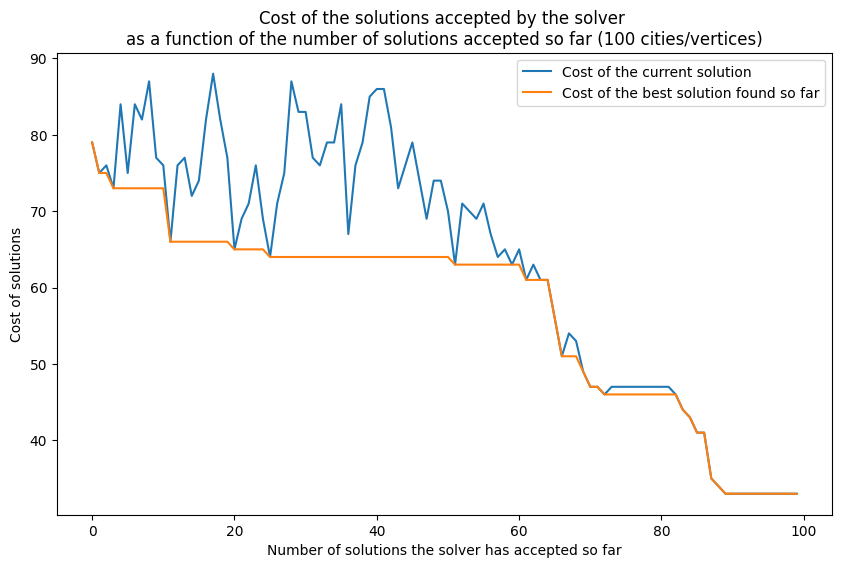

In [ ]:
example_large_problem = problem_from_seed(1955807,
    vertex_count=100, max_cost=15, max_demand=5, max_truck_count=97, max_truck_capacity=73
)


print(example_large_problem)
DEBUG=False  # set to True to see the different steps taken by the algorithm

# hard to read, uncomment the following to read anyway
# plot_instance(example_large_problem)
plot_costs(*test(example_large_problem), 100)

Based on the results obtained above, we can analyze the effect of the Simulated annealing on the cost to solve a given route i.e optimise a given route.

A higher initial temperature allows the algorithm to explore a broader solution space, avoiding local minima and potentially finding better solutions.
As the temperature decreases, the algorithm becomes more focused on refining solutions, which can lead to both faster convergence and suboptimal solutions. Therefore, adjusting the initial temperature significantly impacts the algorithm’s ability to minimize the total cost of the routes.

To summarize, the initial temperature has the most significant impact on the cost because it determines how much the algorithm is allowed to explore the solution space. A higher initial temperature enables better exploration but results in greater variability in solution quality and execution time. Fine-tuning this parameter is critical to balancing solution quality and algorithm efficiency.
Thus, the key important factor is the cost of a given route.


The code above also managed to approximate a solution to our problem for the instance of 100 vertices. The solution obtained is displayed in the last few lines of the associated block's text output. The initial solution had a weight of 76, while the final one has a weight if 33.

The experimental performance of the simulated annealing algorithm was assessed by varying key parameters, such as initial temperature and temperature factor, across multiple runs. The results showed that the algorithm effectively converged to low-cost solutions, but solution quality varied depending on parameter settings. A higher initial temperature allowed for more exploration, while a lower temperature factor led to slower convergence. Although the algorithm was efficient, diminishing returns were observed at higher iteration counts. To improve performance, fine-tuning the temperature decay, using better neighborhood search strategies, or combining simulated annealing with other optimization methods could enhance solution quality and efficiency.

#IV. Conclusion

In conclusion, the experimental design we implemented for the delivery route optimization problem is aligned with the objectives of the ADEME call, focusing on efficient management of delivery routes in a road network. The primary goal of minimizing the total duration while ensuring that each city is visited exactly once by a single route was successfully addressed using the simulated annealing algorithm. By incorporating additional realistic constraints into the problem, we aimed to better capture the complexities of real-world mobility solutions, making our approach more practical and in line with ADEME’s expectations.

The methodology involved testing the algorithm under different configurations of initial temperature and temperature factor, with a comprehensive analysis of the results to assess performance in terms of solution quality, execution time, and acceptance rate. The statistical analysis provided valuable insights into the impact of parameter choices on the algorithm’s ability to converge to optimal solutions, revealing that while the algorithm performed well, there were diminishing returns at higher iterations, and certain parameter settings led to suboptimal performance.

Based on these statistical results, we propose improvements to enhance the algorithm’s performance, such as fine-tuning the temperature decay schedule could improve convergence speed without sacrificing solution quality, while incorporating more sophisticated neighborhood search strategies could increase the robustness of the solution process. Additionally, exploring hybrid approaches combining simulated annealing with other optimization techniques could further refine our approach, making it more effective for real-world applications. These proposals are rooted in our analysis and are justified as necessary steps to optimize the delivery route management process, ultimately meeting ADEME’s objectives more efficiently and effectively.

# V. References

* [1] Tadeusz Ostrowski, Petroula M. Mavrikiou. (2015). A Heuristic Algorithm for Optimal Hamiltonian Cycles in Weighted Graphs. Advances in mathematics.

- [2] Seth Gilbert. (2015). The Asymmetric Traveling Salesman. Optimization Algorithms.

- [3] Vivek Bagaria, Jian Ding, David Tse, Yihong Wu, Jiaming Xu. (2018). Hidden Hamiltonian Cycle Recovery via Linear Programming

- [4] Chunyu Ren. (09/11/2011). Solving Min-Max Vehicle Routing Problem. Journal of software, Vol6.

- [5] Google operations research tools on TSP. https://developers.google.com/optimization/routing/tsp

- [6] TSP. Hexaly. Route optimisation software and API. https://www.hexaly.com/docs/last/exampletour/tsp.html

- [7] Said Elatar, Karim Abouelmehdi, & Riffi, M. E. (2023). The vehicle routing problem in the last decade: variants, taxonomy and metaheuristics. Procedia Computer Science, 220, 398–404. https://doi.org/10.1016/j.procs.2023.03.051

- [8] Louati, A., Rahma Lahyani, Abdulaziz Aldaej, Racem Mellouli, & Muneer Nusir. (2021). Mixed Integer Linear Programming Models to Solve a Real-Life Vehicle Routing Problem with Pickup and Delivery. Applied Sciences, 11(20), 9551–9551. https://doi.org/10.3390/app11209551

- [9] Vladimir Deineko, Alexander Tiskin. (2014). One-sided monge TSP in NP-Hard. NP vs P problems.

- [10] Stephen C.H.Leung, Defu Zhang, Xiyue Zhou. (2010). Simulated annealing for the vehicle routing problem with two-dimensional loading constraints. Flexible and Manufacturing Journal.

- [11] Kenan Karagül, Yusuf Şahin, Erdal Aydemir, Aykut Oral. (2019). A Simulated Annealing Algorithm Based Solution Method for a Green Vehicle Routing Problem with Fuel Consumption: Optimization Models and Algorithms

- [12] Ameer Dharamshi. (2019). Solving the Vehicle Routing Problem with Simulated Annealing
https://ameerd.github.io/files/VRP-Project---Github-Version.html#5_simulated_annealing_approach

